In [1]:
# installing the libraries
!pip install requests
!pip install bs4
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!pip install chromedriver-py
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.3 MB 4.1 MB/s 
     |████████████████████████████████| 140 kB 59.0 MB/s 
     |████████████████████████████████| 384 kB 52.5 MB/s 
     |████████████████████████████████| 58 kB 5.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.13 which is incompatible.
Get:1 https://cloud.r-

In [2]:
# importing the libraries
import requests
from bs4 import BeautifulSoup as soup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd
import json
from google.colab import drive
import sys
import spacy
import time

/usr/local/lib/python3.8/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from tqdm import tqdm;

In [40]:
#ssm_links = pd.read_csv('NLP_Proj_Link_list.txt', header= None);
#ssm_links = pd.read_csv('data_fix.csv');
#ssm_links = pd.read_csv('Links_Speakers (1).csv', header = None);
#ssm_links = pd.read_csv('message.txt', header = None);
#ssm_links.columns = ['links', 'speaker']
#ssm_links = ssm_links.drop(columns = 'Unnamed: 0');
#ssm_links.columns = ['links', 'speaker', 'text_speeches']
#ssm_links.columns = ['links', 'speaker']

jay_links = [
    'https://millercenter.org/the-presidency/presidential-speeches/november-12-1921-opening-speech-conference-limitation-armament',
'https://millercenter.org/the-presidency/presidential-speeches/december-6-1921-first-annual-message',
'https://millercenter.org/the-presidency/presidential-speeches/december-8-1922-second-annual-message',
'https://millercenter.org/the-presidency/presidential-speeches/may-23-1921-speech-upon-arrival-world-war-one-dead-burial',
'https://millercenter.org/the-presidency/presidential-speeches/july-22-1920-american-soldier',
'https://millercenter.org/the-presidency/presidential-speeches/september-11-1919-safeguarding-america',
'https://millercenter.org/the-presidency/presidential-speeches/june-1-1812-special-message-congress-foreign-policy-crisis-war',
'https://millercenter.org/the-presidency/presidential-speeches/june-19-1812-proclamation-state-war-great-britain',
'https://millercenter.org/the-presidency/presidential-speeches/may-25-1813-message-special-congressional-session-state-war',
'https://millercenter.org/the-presidency/presidential-speeches/september-1-1814-proclamation-upon-british-depredations',
'https://millercenter.org/the-presidency/presidential-speeches/july-23-1813-proclamation-day-public-humiliation-and-prayer',
'https://millercenter.org/the-presidency/presidential-speeches/may-19-1917-message-regarding-military-draft',
'https://millercenter.org/the-presidency/presidential-speeches/april-17-1917-message-regarding-world-war-i',
'https://millercenter.org/the-presidency/presidential-speeches/april-6-1917-proclamation-1364',
'https://millercenter.org/the-presidency/presidential-speeches/april-2-1917-address-congress-requesting-declaration-war',
'https://millercenter.org/the-presidency/presidential-speeches/february-26-1917-message-regarding-safety-merchant-ships',
'https://millercenter.org/the-presidency/presidential-speeches/january-22-1917-world-league-peace-speech',
'https://millercenter.org/the-presidency/presidential-speeches/july-12-1900-speech-accepting-republican-nomination',
'https://millercenter.org/the-presidency/presidential-speeches/april-23-1898-proclamation-calling-military-volunteers',
'https://millercenter.org/the-presidency/presidential-speeches/april-22-1898-proclamation-regarding-blockade-cuba',
'https://millercenter.org/the-presidency/presidential-speeches/april-11-1898-message-regarding-cuban-civil-war',
'https://millercenter.org/the-presidency/presidential-speeches/may-17-1897-message-regarding-relief-americans-cuba',
'https://millercenter.org/the-presidency/presidential-speeches/february-8-1849-message-regarding-treaty-guadalupe-hidalgo',
'https://millercenter.org/the-presidency/presidential-speeches/january-2-1849-message-regarding-war-time-measures',
'https://millercenter.org/the-presidency/presidential-speeches/august-14-1848-message-regarding-slavery-territories',
'https://millercenter.org/the-presidency/presidential-speeches/august-1-1848-message-regarding-size-army',
'https://millercenter.org/the-presidency/presidential-speeches/july-6-1848-message-regarding-treaty-guadalupe-hidalgo',
'https://millercenter.org/the-presidency/presidential-speeches/july-4-1848-announcement-peace-treaty-mexico',
'https://millercenter.org/the-presidency/presidential-speeches/february-13-1847-message-regarding-war-mexico',
'https://millercenter.org/the-presidency/presidential-speeches/january-28-1861-message-resolutions-virginia',
'https://millercenter.org/the-presidency/presidential-speeches/march-1-1861-message-regarding-presence-troops-washington-dc',
'https://millercenter.org/the-presidency/presidential-speeches/january-8-1861-message-threats-peace-and-existence-union',
'https://millercenter.org/the-presidency/presidential-speeches/march-28-1860-protest-congressional-investigations',
'https://millercenter.org/the-presidency/presidential-speeches/february-18-1859-special-message-regarding-transit-across',
'https://millercenter.org/the-presidency/presidential-speeches/january-13-1875-message-regarding-intervention-louisiana',
'https://millercenter.org/the-presidency/presidential-speeches/september-15-1874-proclamation-regarding-disturbances',
'https://millercenter.org/the-presidency/presidential-speeches/december-19-1871-message-civil-service-reform',
'https://millercenter.org/the-presidency/presidential-speeches/october-17-1871-proclamation-suspending-habeas-corpus',
'https://millercenter.org/the-presidency/presidential-speeches/august-22-1870-proclamation-establishing-us-neutrality',
'https://millercenter.org/the-presidency/presidential-speeches/june-13-1870-message-regarding-insurrection-cuba',
'https://millercenter.org/the-presidency/presidential-speeches/july-14-1870-message-regarding-us-international-relations',
'https://www.speeches-usa.com/Transcripts/winston_churchill-blood.html',
'https://www.speeches-usa.com/Transcripts/winston_churchill-dunkirk.html',
'https://www.speeches-usa.com/Transcripts/winston_churchill-finest.html',
'https://www.speeches-usa.com/Transcripts/winston_churchill-ironcurtain.html',
'https://hitler.org/speeches/09-18-22.html',
'https://hitler.org/speeches/04-10-23.html',
'https://hitler.org/speeches/04-24-23.html',
'https://hitler.org/speeches/04-27-23.html'
]

In [42]:
jay_df = pd.DataFrame (jay_links);
jay_df.columns = ['links']
#ssm_links

In [11]:
import re

In [19]:
#pattern = re.compile(r'(\w{3}\W{1}\w+\W{1}\w{3})');
pattern = re.compile(r'(\w{3}\W{1})(\w+)(\W{1}\w{3})');
pattern_2 = re.compile(r'(\w{5}\W{3})(\w+)(\W{1}\w{3})');

In [43]:
#ssm_links['links'] [0]
jay_df['links'][0]

'https://millercenter.org/the-presidency/presidential-speeches/november-12-1921-opening-speech-conference-limitation-armament'

In [45]:
#link = pattern_2.findall(ssm_links['links'][0]);
#link

link = pattern_2.findall(jay_df['links'][0]);
link

[('https://', 'millercenter', '.org')]

In [46]:
link_domain = [];
#for i in tqdm(ssm_links['links']):
for i in tqdm(jay_df['links']):
  temp = pattern_2.findall(i);
  #link_domain.append(temp[0][1]);
  link_domain.append(temp[0][1]);

link_domain

100%|██████████| 49/49 [00:00<00:00, 87679.56it/s]


['millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'millercenter',
 'www',
 'www',
 'www',
 'www',
 'hitler',
 'hitler',
 'hitler',
 'hitler']

In [47]:
#ssm_links['web_domain'] = link_domain;
#ssm_links
jay_df['web_domain'] = link_domain;
jay_df

,links,web_domain
0,https://millercenter.org/the-presidency/presid...,millercenter
1,https://millercenter.org/the-presidency/presid...,millercenter
2,https://millercenter.org/the-presidency/presid...,millercenter
3,https://millercenter.org/the-presidency/presid...,millercenter
4,https://millercenter.org/the-presidency/presid...,millercenter
5,https://millercenter.org/the-presidency/presid...,millercenter
6,https://millercenter.org/the-presidency/presid...,millercenter
7,https://millercenter.org/the-presidency/presid...,millercenter
8,https://millercenter.org/the-presidency/presid...,millercenter
9,https://millercenter.org/the-presidency/presid...,millercenter


In [37]:
ssm_links.to_csv('Gaurav_links.csv')

In [48]:
# to_replace: 19, 21, 22
#ssm_links['web_domain'][19].replace()
#ssm_links.iloc[19, 2] = 'eudocs';
#ssm_links.iloc[21, 2] = 'nelsonmandela';
#ssm_links.iloc[22, 2] = 'nelsonmandela';

#ssm_links['web_domain'][19].replace()
jay_df.iloc[41, 1] = 'speeches-usa';
jay_df.iloc[42, 1] = 'speeches-usa';
jay_df.iloc[43, 1] = 'speeches-usa';
jay_df.iloc[44, 1] = 'speeches-usa';


In [50]:
#ssm_links
jay_df.to_csv('jay_links.csv');

In [ ]:
# source: https://stackoverflow.com/questions/72188582/sslerror-max-retries-exceeded-with-url-error-how-to-fix-this
# fixing unsafe request handling using code from above source

import requests
from urllib3.exceptions import InsecureRequestWarning # for exception handling
from urllib3 import disable_warnings # for processing regardless of warning prompt

disable_warnings(InsecureRequestWarning)

#page = requests.get('http://facebook.com', verify=False)

#print(page.content)


#source: https://www.tutorialspoint.com/how-to-get-useragent-information-in-selenium-web-driver#:~:text=We%20can%20get%20the%20user,to%20pass%20the%20return%20navigator.

#op = webdriver.ChromeOptions();
#driver = webdriver.Chrome(executable_path="/usr/bin", options=op);
#a= driver.execute_script("return navigator.userAgent");
#print (a)

#user_agent = webdriver.execute_script("return navigator.userAgent");
#user_agent

In [ ]:
request_arr = [];
soups_arr = [];
# source for spoof headers: https://stackoverflow.com/questions/38489386/python-requests-403-forbidden
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}

for i in tqdm(ssm_links['links']):
  temp_res = requests.get(i, headers = headers, verify = False);
  print (temp_res.status_code);
  temp_soup = soup(temp_res.text, "html.parser");
  request_arr.append(temp_res);
  soups_arr.append(temp_soup);
  #time.sleep(4);


  4%|▍         | 1/25 [00:00<00:18,  1.29it/s]

200


  8%|▊         | 2/25 [00:03<00:37,  1.65s/it]

200


 12%|█▏        | 3/25 [00:03<00:28,  1.28s/it]

200


 16%|█▌        | 4/25 [00:04<00:24,  1.19s/it]

200


 20%|██        | 5/25 [00:05<00:17,  1.15it/s]

200
200


 36%|███▌      | 9/25 [00:05<00:05,  3.08it/s]

200
200
200


 44%|████▍     | 11/25 [00:05<00:03,  4.22it/s]

200
200
200


 60%|██████    | 15/25 [00:06<00:01,  6.80it/s]

200
200
200
200


 68%|██████▊   | 17/25 [00:07<00:03,  2.57it/s]

200


 72%|███████▏  | 18/25 [00:08<00:02,  2.76it/s]

200


 76%|███████▌  | 19/25 [00:09<00:03,  1.94it/s]

200


 80%|████████  | 20/25 [00:10<00:03,  1.58it/s]

200


 84%|████████▍ | 21/25 [00:29<00:20,  5.17s/it]

200
200


 92%|█████████▏| 23/25 [00:30<00:06,  3.15s/it]

200


 96%|█████████▌| 24/25 [00:31<00:02,  2.39s/it]

200


100%|██████████| 25/25 [00:32<00:00,  1.29s/it]

200


In [ ]:
speech_data = [];
speech_ind = [];
for i in range (len(soups_arr)):
  temp_speech = "";

  if ssm_links.iloc[i, 2] == 'americanrhetoric':
    
    temp_container = soups_arr[i].findAll("p")[11:75];
    
    for j in tqdm(temp_container):
      temp_speech = temp_speech + j.text;
    


  
  elif ssm_links.iloc[i, 2] == 'blackpast':
    
    temp_container = soups_arr[i].findAll("p")[:-3];
    
    for j in tqdm(temp_container):
      temp_speech = temp_speech + j.text + "\n";
    

  elif ssm_links.iloc[i, 2] == 'marxists':
    temp_container = soups_arr[i].findAll("p");
    
    for j in tqdm(temp_container):
      temp_speech = temp_speech + j.text;

  elif ssm_links.iloc[i, 2] == 'nobelprize':
    temp_container = soups_arr[i].findAll("p")[1:-28];
    
    for j in tqdm(temp_container):
      temp_speech = temp_speech + j.text + "\n";

  
  elif ssm_links.iloc[i, 2] == 'nwesd':
    temp_container = soups_arr[i].findAll("p")[2:-5];
    
    for j in tqdm(temp_container):
      temp_speech = temp_speech + j.text + "\n";


  elif ssm_links.iloc[i, 2] == 'theguardian':
    temp_container = soups_arr[i].findAll("p")[:-1];

    for j in tqdm(temp_container):
      temp_speech = temp_speech + j.text + "\n";


  elif ssm_links.iloc[i, 2] == 'historyplace':
    temp_container = soups_arr[i].findAll("p")[7:-5];
    
    for j in tqdm(temp_container):
      temp_speech = temp_speech + j.text + "\n";

  elif ssm_links.iloc[i, 2] == 'eudocs':
    temp_container = soups_arr[i].findAll("p")[3:-4];

    for j in tqdm(temp_container):
      temp_speech = temp_speech + j.text + "\n";


  elif ssm_links.iloc[i, 2] == 'washingtonpost':
    temp_container = soups_arr[i].findAll("p")[4:];

    for j in tqdm(temp_container):
      temp_speech = temp_speech + j.text + "\n";


  elif ssm_links.iloc[i, 2] == 'nelsonmandela':
    temp_container = soups_arr[i].findAll("p")[1:-1];

    for j in tqdm(temp_container):
      temp_speech = temp_speech + j.text + "\n";


  elif ssm_links.iloc[i, 2] == 'fdrlibrary':
    temp_container = soups_arr[i].findAll("p")[5:-2];

    for j in tqdm(temp_container):
      temp_speech = temp_speech + j.text + "\n";


  elif ssm_links.iloc[i, 2] == 'americanyawp':
      temp_container = soups_arr[i].findAll("p")[2:-2];

      for j in tqdm(temp_container):
        temp_speech = temp_speech + j.text + "\n";
  else:
    print ("ERROR! UNRECOGNIZED SOURCE! @i: ", i, "\n" );

  
  speech_data.append(temp_speech);
  speech_ind.append(i);
  

100%|██████████| 9/9 [00:00<00:00, 46317.47it/s]


In [ ]:
ssm_links.iloc[:, 2].value_counts()

marxists            13
nelsonmandela        2
americanrhetoric     1
blackpast            1
nobelprize           1
nwesd                1
theguardian          1
historyplace         1
eudocs               1
washingtonpost       1
fdrlibrary           1
americanyawp         1
Name: web_domain, dtype: int64

In [ ]:
ssm_links.iloc[:, 2]

0     americanrhetoric
1            blackpast
2             marxists
3             marxists
4             marxists
5             marxists
6             marxists
7             marxists
8             marxists
9             marxists
10            marxists
11            marxists
12            marxists
13            marxists
14            marxists
15          nobelprize
16               nwesd
17         theguardian
18        historyplace
19              eudocs
20      washingtonpost
21       nelsonmandela
22       nelsonmandela
23          fdrlibrary
24        americanyawp
Name: web_domain, dtype: object

In [ ]:
ssm_links['speeches'] = speech_data;
ssm_links

,links,speaker,web_domain,speeches
0,https://www.americanrhetoric.com/speeches/mlka...,Martin Luther King Jr.,americanrhetoric,\n \n[AUTHENTICITY CERTIFIED: Text version bel...
1,https://www.blackpast.org/african-american-his...,Frederick Douglass,blackpast,"\nOn January 13, 1864, Frederick Douglass was ..."
2,https://www.marxists.org/archive/hampton/1969/...,Fred Hampton,marxists,"\nWritten: Speech delivered at Olivet Church, ..."
3,https://www.marxists.org/archive/lenin/works/1...,V.I.Lenin,marxists,"\nComrades, the original draft resolution on t..."
4,https://www.marxists.org/reference/archive/sta...,J. V. Stalin,marxists,"J. V. Stalin\nCOMRADES, twenty-four years have..."
5,https://www.marxists.org/reference/archive/sta...,J. V. Stalin,marxists,"J. V. Stalin\nCOMRADES, men of the Red Army an..."
6,https://www.marxists.org/reference/archive/kel...,Helen Keller,marxists,\nHelen Keller Reference Archive\n\nSpoken: Sp...
7,https://www.marxists.org/archive/lenin/works/1...,V.I.Lenin,marxists,"\n\n\n\tPublished:\nBerner Tagwacht, No. 33, F..."
8,https://www.marxists.org/reference/archive/sta...,J. V. Stalin,marxists,"J. V. StalinCOMRADES, citizens, brothers and s..."
9,https://www.marxists.org/reference/archive/sta...,J. V. Stalin,marxists,"J. V. Stalin\nCOMRADES, twenty-four years have..."


In [ ]:
ssm_links.to_csv('ssm_speeches_dataframe.csv')

In [ ]:
print (ssm_links.iloc[24, 0])

https://www.americanyawp.com/reader/reconstruction/frederick-douglass-on-remembering-the-civil-war-1877/


# Data Visualizations based on dataset

In [51]:
gaurav_links = pd.read_csv('Gaurav_links.csv');
ssm_links = pd.read_csv('ssm_speeches_dataframe.csv');
jay_links = jay_df;

In [62]:
#gaurav_links = gaurav_links.drop(columns = 'speeker');
gaurav_links.drop (columns = 'Unnamed: 0', inplace = True);
gaurav_links

,links,web_domain
0,https://millercenter.org/the-presidency/presid...,millercenter
1,https://millercenter.org/the-presidency/presid...,millercenter
2,https://millercenter.org/the-presidency/presid...,millercenter
3,https://millercenter.org/the-presidency/presid...,millercenter
4,https://millercenter.org/the-presidency/presid...,millercenter
5,https://millercenter.org/the-presidency/presid...,millercenter
6,https://millercenter.org/the-presidency/presid...,millercenter
7,https://millercenter.org/the-presidency/presid...,millercenter
8,https://millercenter.org/the-presidency/presid...,millercenter
9,https://millercenter.org/the-presidency/presid...,millercenter


In [64]:
#ssm_links = ssm_links.drop(columns = ['speeches']);
#ssm_links = ssm_links.drop(columns = ['speaker']);
ssm_links = ssm_links.drop(columns = ['Unnamed: 0']);
ssm_links

,links,web_domain
0,https://www.americanrhetoric.com/speeches/mlka...,americanrhetoric
1,https://www.blackpast.org/african-american-his...,blackpast
2,https://www.marxists.org/archive/hampton/1969/...,marxists
3,https://www.marxists.org/archive/lenin/works/1...,marxists
4,https://www.marxists.org/reference/archive/sta...,marxists
5,https://www.marxists.org/reference/archive/sta...,marxists
6,https://www.marxists.org/reference/archive/kel...,marxists
7,https://www.marxists.org/archive/lenin/works/1...,marxists
8,https://www.marxists.org/reference/archive/sta...,marxists
9,https://www.marxists.org/reference/archive/sta...,marxists


In [65]:
jay_df

,links,web_domain
0,https://millercenter.org/the-presidency/presid...,millercenter
1,https://millercenter.org/the-presidency/presid...,millercenter
2,https://millercenter.org/the-presidency/presid...,millercenter
3,https://millercenter.org/the-presidency/presid...,millercenter
4,https://millercenter.org/the-presidency/presid...,millercenter
5,https://millercenter.org/the-presidency/presid...,millercenter
6,https://millercenter.org/the-presidency/presid...,millercenter
7,https://millercenter.org/the-presidency/presid...,millercenter
8,https://millercenter.org/the-presidency/presid...,millercenter
9,https://millercenter.org/the-presidency/presid...,millercenter


In [68]:
new_df = pd.merge(left = ssm_links, right = gaurav_links, how = 'outer');
new_df = pd.merge(left = new_df, right = jay_df, how = 'outer');
new_df

,links,web_domain
0,https://www.americanrhetoric.com/speeches/mlka...,americanrhetoric
1,https://www.blackpast.org/african-american-his...,blackpast
2,https://www.marxists.org/archive/hampton/1969/...,marxists
3,https://www.marxists.org/archive/lenin/works/1...,marxists
4,https://www.marxists.org/reference/archive/sta...,marxists
...,...,...
109,https://www.speeches-usa.com/Transcripts/winst...,speeches-usa
110,https://hitler.org/speeches/09-18-22.html,hitler
111,https://hitler.org/speeches/04-10-23.html,hitler
112,https://hitler.org/speeches/04-24-23.html,hitler


In [69]:
import matplotlib.pyplot as plt;
import seaborn as sns;

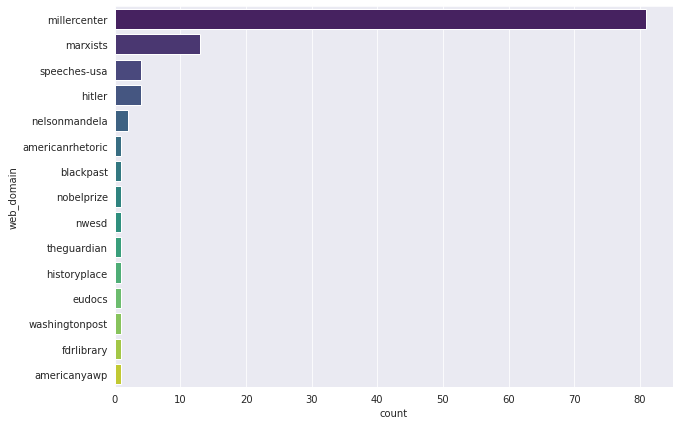

In [80]:
sns.set_style('darkgrid');
plt.figure(figsize = (10, 7));
sns.countplot(y = new_df['web_domain'], palette = 'viridis', order = new_df['web_domain'].value_counts().index)

In [74]:
df = pd.read_csv('data_fix.csv');

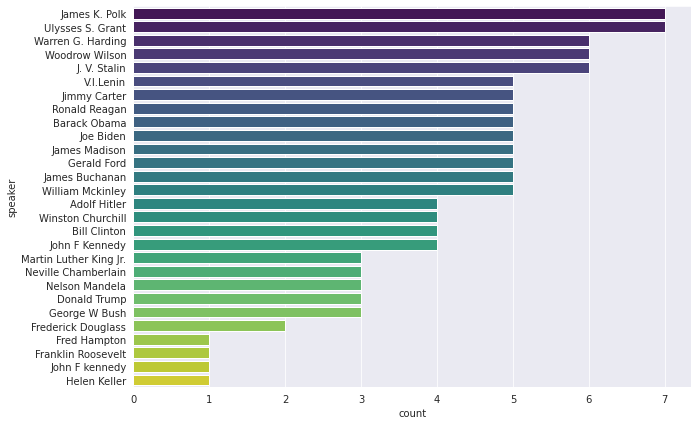

In [82]:
sns.set_style('darkgrid');
plt.figure(figsize = (10, 7));
sns.countplot(y = df['speaker'], palette = 'viridis', order = df['speaker'].value_counts().index)